In [31]:
%run quatic_coupled_fields.py
%run observables.py
%run transport_equation.py

In [29]:
def compute_quatic_observables(H_inf, Gamma_inf, initial_ratio, q, m_1, m_2, g, f_1, f_2, debug=True):
    ax_params = (m_1, m_2, g, f_1, f_2)
    ax_init = (1.0, initial_ratio, 0.0, 0.0)
    eta_B, _, _, _, _, status = \
        compute_observables(H_inf, Gamma_inf, ax_params, f_1, quatic_coupled_fields, 
                            ax_init, source_vector_weak_sphaleron)#, debug=True) 
    print(status)
    Omega_h_sq = relic_density_quatic_coupled_two_fields(initial_ratio, q, m_1, m_2, g, f_1, f_2)
    return np.log10(eta_B / eta_B_observed), np.log10(Omega_h_sq / Omega_DM_h_sq)

In [32]:
compute_quatic_observables(1e12, 1e12, 1.0, 2.0, 1e-2, 1e-3, 1, 1e12, 1e11)

1.0


(0.5133132566627696, -15.784078304261326)

In [63]:
H_inf, Gamma_inf, initial_ratio, q, m_1, m_2, g, f_1, f_2 = 1e12, 1e12, 1.0, 2.0, 1e-2, 1e-3, 1, 1e10, 1e9
ax_params = (m_1, m_2, g, f_1, f_2)
ax_init = (1.0, initial_ratio, 0.0, 0.0)
background_sols, axion_sols, red_chem_pot_sols = \
    compute_observables(H_inf, Gamma_inf, ax_params, f_1, quatic_coupled_fields, 
                        ax_init, source_vector_weak_sphaleron, return_evolution=True)
energy_scale = quatic_coupled_fields.find_dynamical_scale(*ax_params)
conv_factor = Gamma_inf / energy_scale

/home/anna-jana/Documents/masters-project/transport_eq_in_time/transport_equation.py:163: RuntimeWarning: overflow encountered in true_divide
  - (R * (charge_vector @ red_chem_pots - source_vector * theta_dot / T / unit)) @ charge_vector / dofs
/home/anna-jana/Documents/masters-project/transport_eq_in_time/transport_equation.py:163: RuntimeWarning: invalid value encountered in multiply
  - (R * (charge_vector @ red_chem_pots - source_vector * theta_dot / T / unit)) @ charge_vector / dofs
/home/anna-jana/Documents/masters-project/transport_eq_in_time/transport_equation.py:153: RuntimeWarning: overflow encountered in exp
  t = np.exp(log_t)


Text(0, 0.5, 'T')

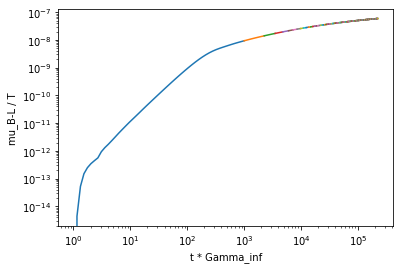

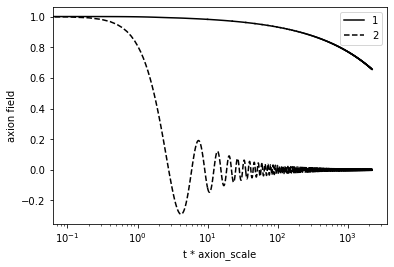

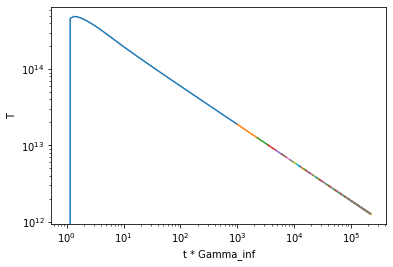

In [65]:
plt.figure()
t = 0
for ax_sol, red_chem_sol in zip(axion_sols, red_chem_pot_sols):
    ts = np.geomspace(decay_process.t0, decay_process.t0 + ax_sol.t[-1] * conv_factor, 50)
    plt.loglog(t + ts, -calc_B_minus_L(red_chem_sol(np.log(ts))))
    t += ts[-1] - decay_process.t0
plt.xlabel("t * Gamma_inf")
plt.ylabel("mu_B-L / T")
plt.figure()
t = 0
lss = ["-", "--", ":"]
for n, ax_sol in enumerate(axion_sols):
    ts = np.linspace(0, ax_sol.t[-1], 100)
    y = ax_sol.sol(ts)
    for i, thetas in enumerate(y[:len(y) // 2]):
        plt.semilogx(t + ts, thetas, color="k", ls=lss[i], label=i + 1 if n == 0 else None)
    t += ts[-1]
plt.xlabel("t * axion_scale")
plt.ylabel("axion field")
plt.legend()
plt.figure()
t = 0
for T_and_H_and_T_dot_fn, ax_sol in zip(background_sols, axion_sols):
    ts = np.geomspace(decay_process.t0, decay_process.t0 + ax_sol.t[-1] * conv_factor, 50)
    T, _, _ = T_and_H_and_T_dot_fn(ts)
    plt.loglog(t + ts, T)
    t += ts[-1] - decay_process.t0
plt.xlabel("t * Gamma_inf")
plt.ylabel("T")